# Proyecto Sprint 12

Los datos se almacenan en tres archivos:

gold_recovery_train.csv — el dataset de entrenamiento descargado

gold_recovery_test.csv —el dataset de prueba descargado

gold_recovery_full.csv — el dataset fuente descargado

Los datos se indexan con la fecha y la hora de adquisición (date). Los parámetros cercanos en el tiempo suelen ser similares.

Algunos parámetros no están disponibles porque fueron medidos o calculados mucho más tarde. Por eso, algunas de las características que están presentes en el conjunto de entrenamiento pueden estar ausentes en el conjunto de prueba. El conjunto de prueba tampoco contiene objetivos.

El dataset fuente contiene los conjuntos de entrenamiento y prueba con todas las características.

Tienes a tu disposición los datos en bruto que solamente fueron descargados del almacén de datos. Antes de construir el modelo, comprueba que los datos sean correctos. Para ello, utiliza nuestras instrucciones.

Instrucciones del proyecto
1. Prepara los datos

1.1. Abre los archivos y examina los datos.

Ruta de acceso a los archivos:

/datasets/gold_recovery_train.csv

/datasets/gold_recovery_test.csv

/datasets/gold_recovery_full.csv

1.2. Comprueba que el cálculo de la recuperación sea correcto. Calcula la recuperación de la característica rougher.output.recovery mediante el conjunto de entrenamiento. Encuentra el EAM entre tus cálculos y los valores de la característica. Facilita los resultados.

1.3. Analiza las características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

1.4. Realiza el preprocesamiento de datos.

2. Analiza los datos

2.1. Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

2.2. Compara las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba. Si las distribuciones varían significativamente, la evaluación del modelo no será correcta.

2.3. Considera las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final. ¿Observas algún valor anormal en la distribución total? Si es así, ¿merece la pena eliminar esos valores de ambas muestras? Describe los resultados y elimina las anomalías.

3. Construye el modelo

3.1. Escribe una función para calcular el valor final de sMAPE.

3.2. Entrena diferentes modelos. Evalúalos aplicando la validación cruzada. Elige el mejor modelo y pruébalo utilizando la muestra de prueba. Facilita los resultados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.metrics import make_scorer

### 1) Importación y examinación de datos

In [2]:
recovery_full = pd.read_csv('C:/Users/gabri/OneDrive/TripleTen/Curso/Sprint 12/gold_recovery_full.csv')
recovery_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [3]:
recovery_test = pd.read_csv('C:/Users/gabri/OneDrive/TripleTen/Curso/Sprint 12/gold_recovery_test.csv')
recovery_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [4]:
recovery_train = pd.read_csv('C:/Users/gabri/OneDrive/TripleTen/Curso/Sprint 12/gold_recovery_train.csv')
recovery_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [5]:
#Definimos las variables

in_ag = recovery_train['rougher.input.feed_ag'] 
in_au = recovery_train['rougher.input.feed_au'] 
in_pb = recovery_train['rougher.input.feed_pb'] 

out_ag = recovery_train['rougher.output.concentrate_ag'] 
out_au =  recovery_train['rougher.output.concentrate_au'] 
out_pb= recovery_train['rougher.output.concentrate_pb']

tail_ag = recovery_train['rougher.output.tail_ag']
tail_au = recovery_train['rougher.output.tail_au']
tail_pb = recovery_train['rougher.output.tail_pb']



In [6]:
    def recovery_pd(input_series, output_series, tail_series):
        """
        Desarrollo de la operación usando pandas
        """
        numerator = output_series * (input_series - tail_series)
        denominator = input_series * (output_series - tail_series)
        
        # Calculamos con manejo de divisiones por cero
        recovery = numerator / denominator.replace(0, np.nan) * 100
        
        # Manejando los casos especiales
        recovery[
            (input_series == 0) | 
            (output_series == tail_series) |
            denominator.isna()
        ] = np.nan
        
        return recovery

    # Uso equivalente
    rec_ag = recovery_pd(in_ag, out_ag, tail_ag)
    rec_au = recovery_pd(in_au, out_au, tail_au)
    rec_pb = recovery_pd(in_pb, out_pb, tail_pb)


**Los datos de recuperación son los siguientes, según el cálculo obtenido:**

In [7]:
print(rec_ag)

0        31.718098
1        34.130168
2        35.523780
3        37.695959
4        39.298779
           ...    
16855    49.751541
16856    50.047845
16857    61.287978
16858    53.325372
16859    53.979149
Length: 16860, dtype: float64


In [8]:
print(rec_au)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 16860, dtype: float64


In [9]:
print(rec_pb)

0        83.734132
1        82.390836
2        80.817574
3        79.378561
4        76.608022
           ...    
16855    91.851538
16856    89.662181
16857    90.613116
16858    89.206757
16859    88.821761
Length: 16860, dtype: float64


**Vamos a ver las estadísticas descriptivas de los datos de recuperación**

a) Para la plata (ag):


In [10]:
estad_ag=rec_ag.describe()
estad_ag

count     14547.000000
mean         -8.091929
std        3075.402320
min     -197939.002994
25%          49.314985
50%          60.816191
75%          73.639757
max       68482.989006
dtype: float64

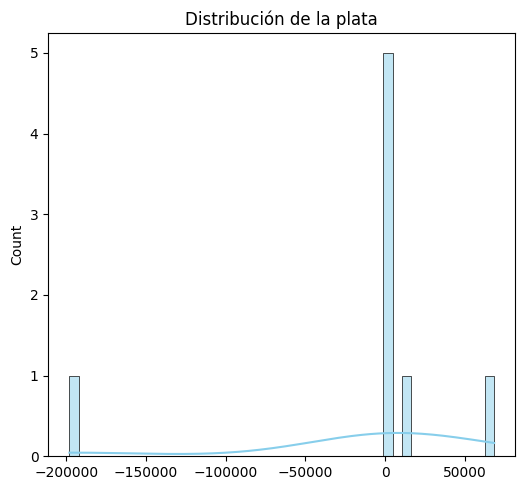

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(estad_ag, kde=True, color='skyblue')
plt.title('Distribución de la plata')
plt.tight_layout()
plt.show()

b) Para el oro:

In [12]:
estad_au = rec_au.describe()
estad_au

count     14547.000000
mean         31.414147
std        3302.773106
min     -366924.161290
25%          79.704808
50%          85.229912
75%          90.203432
max       13802.071756
dtype: float64

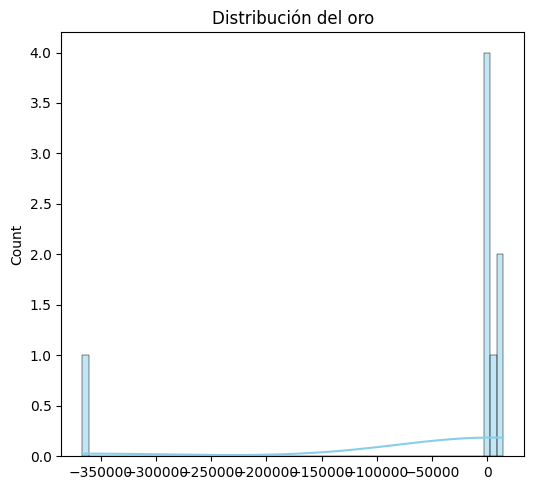

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(estad_au, kde=True, color='skyblue')
plt.title('Distribución del oro')
plt.tight_layout()
plt.show()

c) Para el plomo:

In [14]:
desc_pb = rec_pb.describe()
desc_pb

count    15455.000000
mean        77.154721
std        293.017943
min     -20724.944901
25%         83.205980
50%         88.929603
75%         93.205183
max       2000.553978
dtype: float64

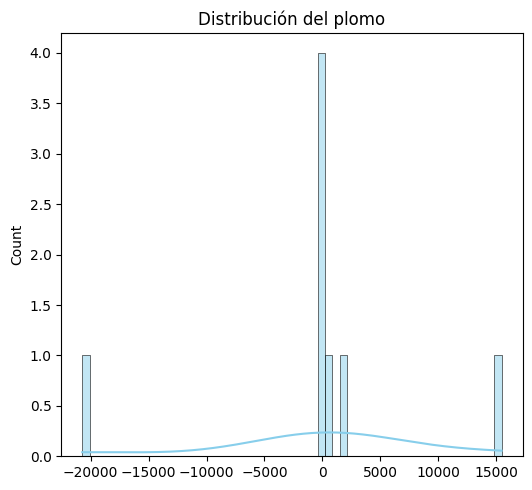

In [15]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(desc_pb, kde=True, color='skyblue')
plt.title('Distribución del plomo')
plt.tight_layout()
plt.show()

Resultados del Error Absoluto Medio (EAM):
Metal          EAM  Puntos válidos Porcentaje válido
   AG 2.634388e+01           14286             84.7%
   AU 9.303416e-15           14287             84.7%
   PB 5.241104e+00           14164             84.0%

El metal con mejor ajuste es: AU (menor EAM)


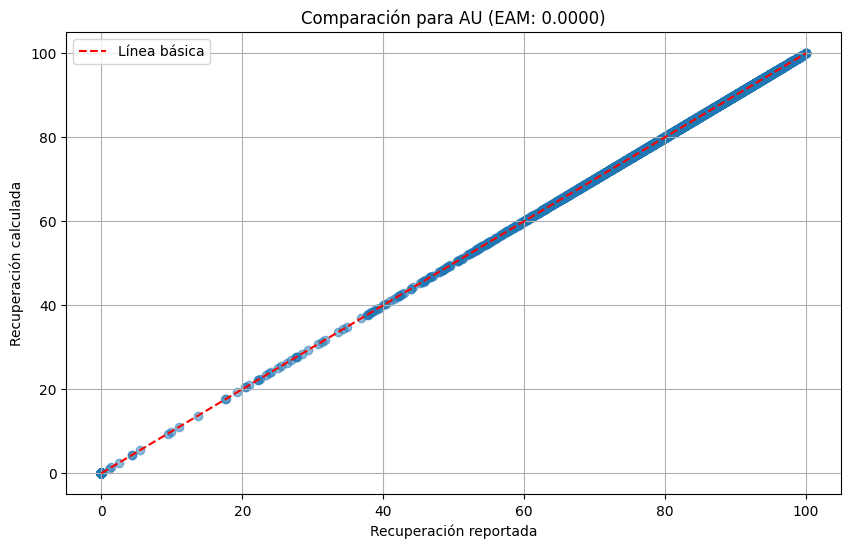

In [16]:
recovery_train['recovery_ag_calc'] = rec_ag
recovery_train['recovery_au_calc'] = rec_au
recovery_train['recovery_pb_calc'] = rec_pb

# COnstrucción de función para calcular EAM con manejo de valores nulos
def calculate_mae(actual, predicted):
    """
    Cálculo del error ebsoluto medio entre series reales y predichas,
    manejando valores nulos adecuadamente.
        """
    
    mask = ~actual.isna() & ~predicted.isna()
    
    if sum(mask) == 0:
        return np.nan, 0
    
    return mean_absolute_error(actual[mask], predicted[mask]), sum(mask)

# Cálculo de EAM 
if 'rougher.output.recovery' in recovery_train.columns:
    results = []
    
    for metal in ['ag', 'au', 'pb']:
        mae, n = calculate_mae(
            recovery_train['rougher.output.recovery'],
            recovery_train[f'recovery_{metal}_calc']
        )
        
        results.append({
            'Metal': metal.upper(),
            'EAM': mae,
            'Puntos válidos': n,
            'Porcentaje válido': f"{n/len(recovery_train)*100:.1f}%"
        })
    
    # DF con los resultados
    mae_results = pd.DataFrame(results)
    
    print("Resultados del Error Absoluto Medio (EAM):")
    print(mae_results.to_string(index=False))
    
    # Identificación del metal con mejor ajuste:
    best_metal = mae_results.loc[mae_results['EAM'].idxmin(), 'Metal']
    print(f"\nEl metal con mejor ajuste es: {best_metal} (menor EAM)")
    
    # Gráfico de comparación para el mejor metal
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    plt.scatter(
        recovery_train['rougher.output.recovery'],
        recovery_train[f'recovery_{best_metal.lower()}_calc'],
        alpha=0.5
    )
    plt.plot([0, 100], [0, 100], 'r--', label='Línea básica')
    plt.xlabel('Recuperación reportada')
    plt.ylabel('Recuperación calculada')
    plt.title(f'Comparación para {best_metal} (EAM: {mae_results[mae_results["Metal"]==best_metal]["EAM"].values[0]:.4f})')
    plt.legend()
    plt.grid(True)
    plt.show()
    
else:
    print("No exitste 'rougher.output.recovery' en DataFrame")
    print("Calculando estadísticas descriptivas de los valores calculados:")
    
    stats_df = recovery_train[['recovery_ag_calc', 'recovery_au_calc', 'recovery_pb_calc']].describe()
    print(stats_df)

Lo que tenemos en los resultados nos indica que:

- **Para el oro** los cálculos son muy buenos, ya que el error es muy bajo. Y lo podemos ver en el gráfico.

- **Para la plata** si tenemos mucha cariación entre los cálculos y el valor reportado.

- **En el caso del plomo** en este análisis, este representa un valor intermedio, ya que se encuentra entre el oro y la plata 

Ofrezco la métrica de R cuadrado para respaldar estos comentarios, y como se puede ver, el R cuadrado, es en cierta forma consistente.

In [17]:
if 'rougher.output.recovery' in recovery_train.columns:
    for metal in ['ag', 'au', 'pb']:
        mask = ~recovery_train['rougher.output.recovery'].isna() & ~recovery_train[f'recovery_{metal}_calc'].isna()
        
        print(f"\nMétricas para {metal.upper()}:")
        print(f"R²: {r2_score(recovery_train['rougher.output.recovery'][mask], recovery_train[f'recovery_{metal}_calc'][mask]):.4f}")
        print(f"RMSE: {np.sqrt(mean_squared_error(recovery_train['rougher.output.recovery'][mask], recovery_train[f'recovery_{metal}_calc'][mask])):.4f}")


Métricas para AG:
R²: -19.8357
RMSE: 68.9105

Métricas para AU:
R²: 1.0000
RMSE: 0.0000

Métricas para PB:
R²: 0.3526
RMSE: 12.0691


**Para el análisis de parámetros en el conjunto de prueba:**

In [18]:
# Obtenemos las columnas de los df
columnas_train = set(recovery_train.columns)
columnas_test = set(recovery_test.columns)

# Identificación de parámetros faltantes en test
faltantes_en_test = columnas_train - columnas_test

# Reporte de características faltantes
parametros_faltantes = []
for columna in faltantes_en_test:
    parametros_faltantes.append({
        'Parámetro': columna,
        'Tipo': recovery_train[columna].dtype,
        'Valores_únicos': recovery_train[columna].nunique(),
        'Porcentaje_nulos_train': round(recovery_train[columna].isna().mean() * 100, 2)
    })

# Df
reporte_faltantes = pd.DataFrame(parametros_faltantes).sort_values(by=['Tipo', 'Porcentaje_nulos_train'], ascending=[True, False])

# Resultados
print(f"\nTotal de parámetros faltantes en recovery_test: {len(faltantes_en_test)}")
print("\nDetalle de parámetros faltantes:")
print(reporte_faltantes.to_string(index=False))


Total de parámetros faltantes en recovery_test: 37

Detalle de parámetros faltantes:
                                         Parámetro    Tipo  Valores_únicos  Porcentaje_nulos_train
                           rougher.output.recovery float64           13945                   15.26
                                  recovery_ag_calc float64           14204                   13.72
                                  recovery_au_calc float64           14205                   13.72
                            rougher.output.tail_ag float64           14575                   13.35
                            rougher.output.tail_au float64           14577                   13.34
                           rougher.output.tail_sol float64           14466                   13.34
                 secondary_cleaner.output.tail_sol float64           12559                   11.78
                             final.output.recovery float64           14766                    9.02
                       

Procedimiento para el manejo de estos valores faltantes, que vemos que en los primeros parámetros si hay un porcentaje significativo en términos de análisis

### 2) Análisis de datos

2.1) **Para la concentración de los datos en etapa de purificación**

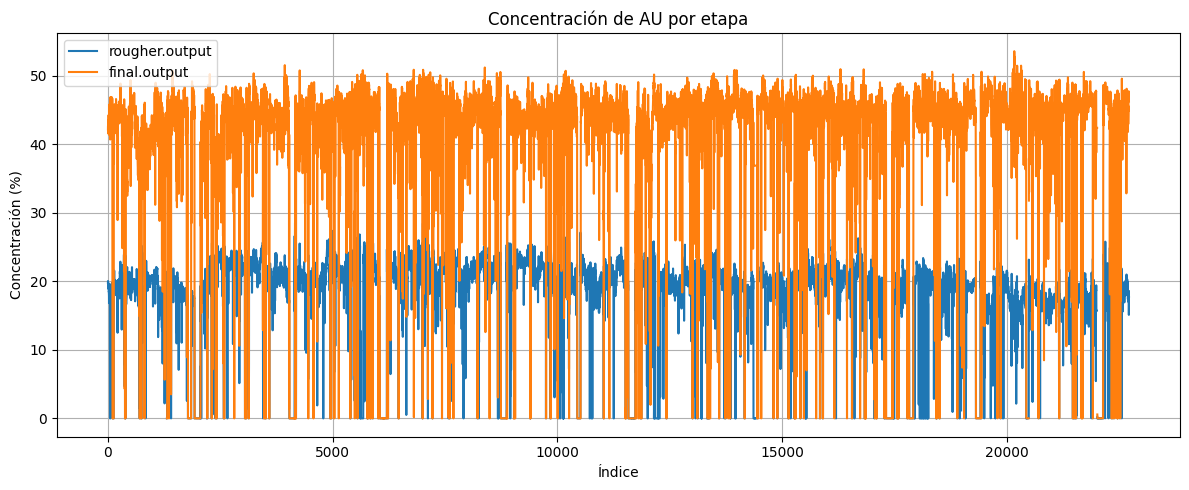

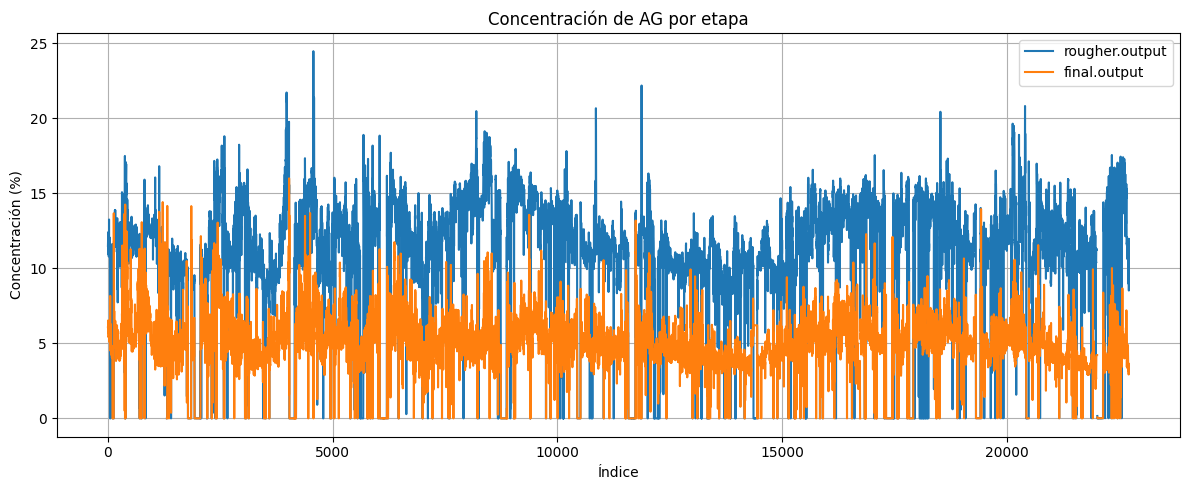

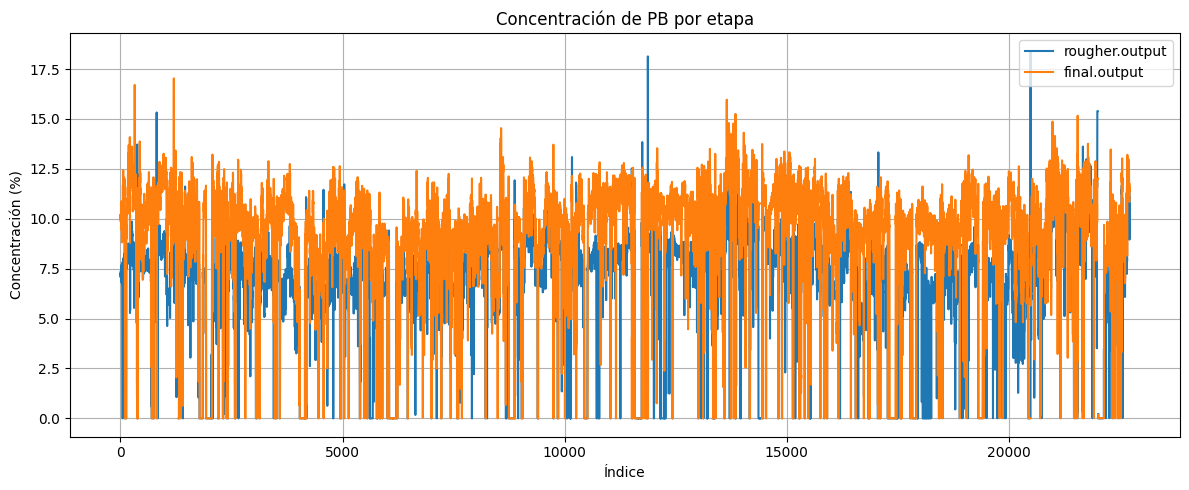

In [19]:
# Extraemos las columnas relacionadas con concentración
metales = ['au', 'ag', 'pb']
etapas = ['rougher.input', 'rougher.output', 'final.output']

# Graficamos la evolución para cada metal
for metal in metales:
    plt.figure(figsize=(12, 5))
    for etapa in etapas:
        col = f'{etapa}.concentrate_{metal}'
        if col in recovery_full.columns:
            recovery_full[col].plot(label=etapa)
    plt.title(f'Concentración de {metal.upper()} por etapa')
    plt.xlabel('Índice')
    plt.ylabel('Concentración (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


2.2) **Distribución entre conjunto de entrenamiento y conjunto de prueba**

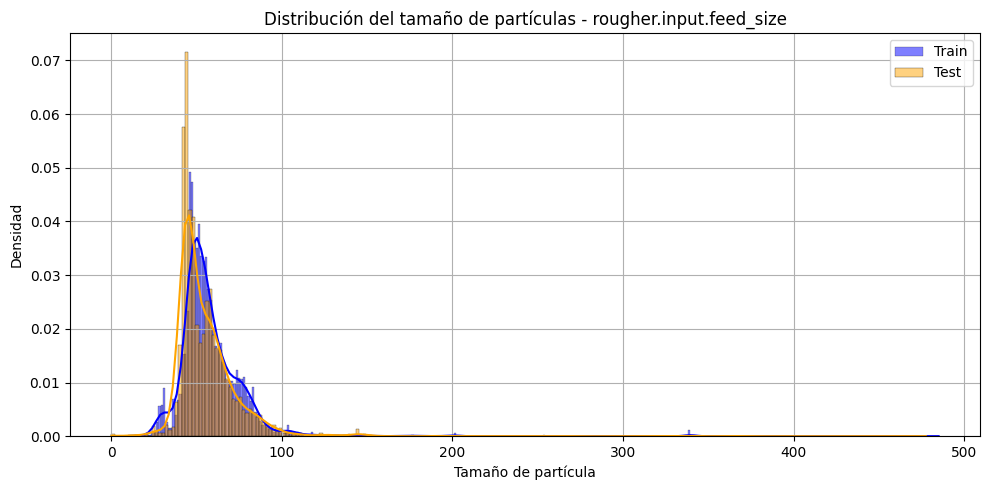

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(recovery_train['rougher.input.feed_size'], label='Train', color='blue', kde=True, stat="density")
sns.histplot(recovery_test['rougher.input.feed_size'], label='Test', color='orange', kde=True, stat="density")
plt.title('Distribución del tamaño de partículas - rougher.input.feed_size')
plt.xlabel('Tamaño de partícula')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2.3) **Concentraciones totales y valores anómalos**

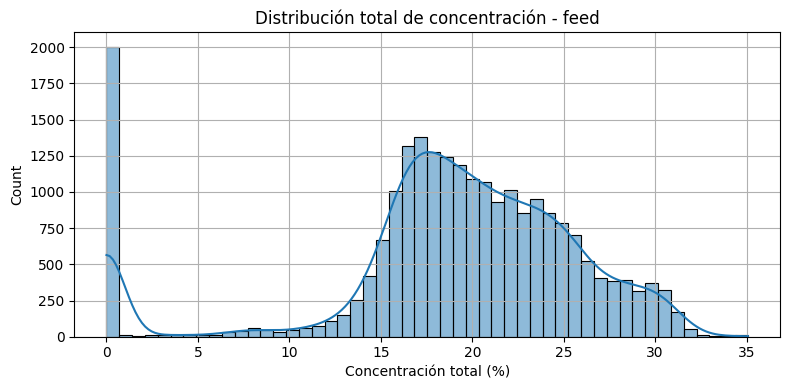

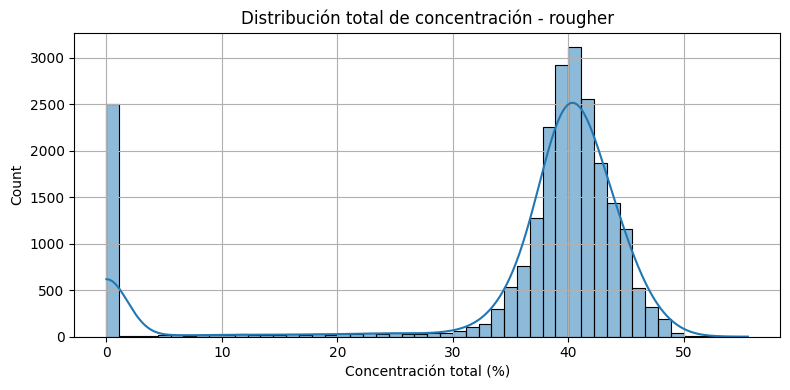

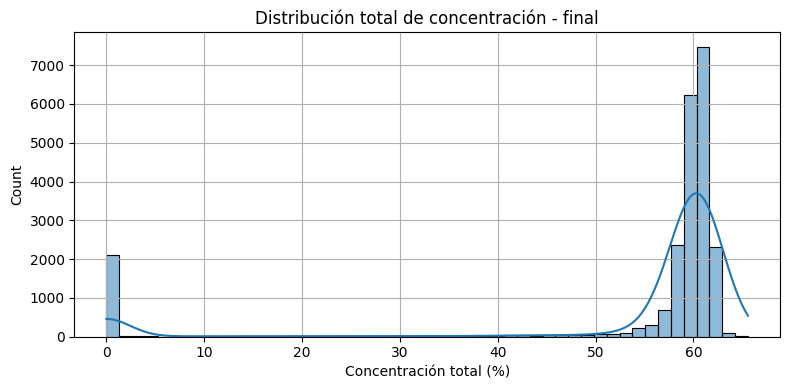

Etapa feed tiene 1626 valores anómalos
Etapa rougher tiene 2051 valores anómalos
Etapa final tiene 1699 valores anómalos


In [21]:
# Creamos columnas de suma total en diferentes etapas
etapas = {
    'feed': ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb'],
    'rougher': ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb'],
    'final': ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']
}

for etapa, cols in etapas.items():
    recovery_full[f'{etapa}_total_conc'] = recovery_full[cols].sum(axis=1)

    plt.figure(figsize=(8, 4))
    sns.histplot(recovery_full[f'{etapa}_total_conc'], bins=50, kde=True)
    plt.title(f'Distribución total de concentración - {etapa}')
    plt.xlabel('Concentración total (%)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Identificamos valores anómalos
for etapa in etapas:
    outliers = recovery_full[(recovery_full[f'{etapa}_total_conc'] <= 0) | (recovery_full[f'{etapa}_total_conc'] > 100)]
    print(f'Etapa {etapa} tiene {len(outliers)} valores anómalos')


**Ahora eliminamos los valores anómalos**

In [22]:
# Calculando la suma de concentraciones para las 3 etapas
recovery_full['rougher.input.total'] = recovery_full[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)
recovery_full['rougher.output.total'] = recovery_full[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']].sum(axis=1)
recovery_full['final.output.total'] = recovery_full[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']].sum(axis=1)

# Eliminar filas donde las concentraciones sean cero o negativas
condition = (recovery_full['rougher.input.total'] > 0) & (recovery_full['rougher.output.total'] > 0) & (recovery_full['final.output.total'] > 0)
cleaned_data = recovery_full[condition].copy()

3) **Construcción del modelo**


In [23]:
cleaned_data = cleaned_data.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])


In [24]:
# Función sMAPE

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return 100 * np.mean(np.abs(y_true - y_pred) / denominator)

scorer = make_scorer(smape, greater_is_better=False)

# Para estos efectos usamos el cleaned_data que ya debe tener anomalías eliminadas

# Separación características y objetivos
features = cleaned_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

# Eliminando la columna date
if 'date' in features.columns:
    features = features.drop('date', axis=1)

# Solo columnas numéricas
features = features.select_dtypes(include=[np.number])

# Objetivos
target_rougher = cleaned_data['rougher.output.recovery']
target_final = cleaned_data['final.output.recovery']


# Imputar valores faltantes (media)

imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)


# División de datos

X_train, X_test, y_train_r, y_test_r, y_train_f, y_test_f = train_test_split(
    features_imputed, target_rougher, target_final, test_size=0.2, random_state=42)


# Escalar los datos

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Probando múltiples modelos

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Validación cruzada y evaluación
for name, model in models.items():
    score_r = -cross_val_score(model, X_train_scaled, y_train_r, cv=5, scoring=scorer).mean()
    score_f = -cross_val_score(model, X_train_scaled, y_train_f, cv=5, scoring=scorer).mean()
    final_score = 0.25 * score_r + 0.75 * score_f
    print(f"{name} → sMAPE final promedio: {final_score:.2f}")


# Entrenamiento del mejor modelo final 

best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train_scaled, y_train_r)
y_pred_r = best_model.predict(X_test_scaled)

best_model.fit(X_train_scaled, y_train_f)
y_pred_f = best_model.predict(X_test_scaled)


# Resultado final

final_smape = 0.25 * smape(y_test_r, y_pred_r) + 0.75 * smape(y_test_f, y_pred_f)
print(f"\n Resultado final de sMAPE en prueba: {final_smape:.2f}")


Linear Regression → sMAPE final promedio: 2.22
Random Forest → sMAPE final promedio: 1.01
Gradient Boosting → sMAPE final promedio: 1.56

 Resultado final de sMAPE en prueba: 1.53
